In [430]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from fisher.combine_plotter import read_and_merge_data
import seaborn as sns
from define_sectors import visualize_sectors_map

In [431]:
with open('results/modified_toulouse_case3_withC_cap5_withReturn_fisher_100.0_1.0_1.0_1.0_2.0_500.0/fisher_data_0.pkl', 'rb') as file:
    data = pkl.load(file)

print(f"Keys: {data.keys()}")

allocation = data["x_prob"]
print(f"Allocation: {allocation}")
price = data["prices"]
# for p in price:
#     print(f"Price: {p}")
# print(f"Price: {price}")
goods = data["goods_list"]
print(f"Goods: {goods}")
# print(f"x: {data['x_prob']}")
print(f"Agent constraints: {data['agent_constraints']}")

# print(data["data_to_plot"].keys())
# print(os.getcwd())
# print(pwd)
path = "/Users/victoria_tuck/Documents/Doctorate/Research_Projects/New_UTM/bluesky-IC/ic/results/modified_toulouse_case3_withC_cap5_withReturn_fisher_100.0_1.0_1.0_1.0_2.0_500.0/fisher_data_0.pkl"
# combined_data = read_and_merge_data([path], "beta")
# print(combined_data.keys())

Keys: dict_keys(['x_prob', 'prices', 'rebates', 'agent_constraints', 'adjusted_budgets', 'desired_goods', 'goods_list', 'capacity', 'data_to_plot'])
Allocation: [[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   1.00000000e+00  7.21509329e-08]
 [ 9.99999996e-01  9.99999996e-01  9.99999996e-01 ...  0.00000000e+00
  -7.13488314e-09  1.69389329e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00 -3.26576341e-09]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000003e+00  4.33079333e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   2.05999855e-08 -5.50554527e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.81261668e-09
   1.00000001e+00  1.80969722e-08]]
Goods: [('V003_7', 'V003_8'), ('V003_8', 'V003_9'), ('V003_9', 'V003_10'), ('V003_10', 'V003_11'), ('V003_11', 'V003_12'), ('V003_12', 'V003_13'), ('V003_13', 'V003_14'), ('V003_14', 'V003_15'), ('V003_1

In [432]:
print(f"Number of agents: {len(allocation)}")

Number of agents: 23


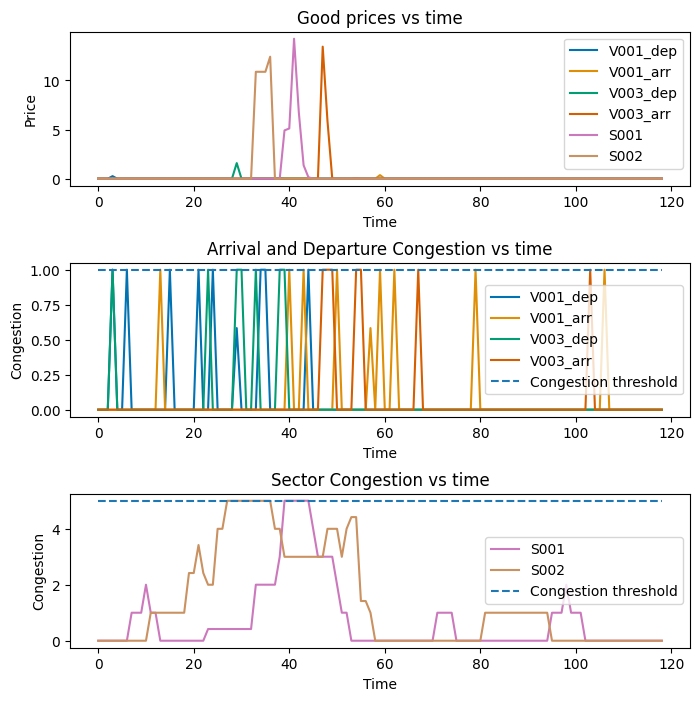

Sector price vs time: {'V001': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'V001_dep': array([0.        , 0.        , 0.        , 0.26171029, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.       

In [433]:
# Determine average sector prices
sector_prices = {}
sector_congestion = {}
goods_added = {}
for id in range(1,5):
    sector_prices[f"V00{id}"] = {}
    sector_prices[f"V00{id}_dep"] = {}
    sector_prices[f"V00{id}_arr"] = {}
    goods_added[f"V00{id}"] = []
    goods_added[f"V00{id}_dep"] = []
    goods_added[f"V00{id}_arr"] = []
    sector_congestion[f"V00{id}"] = {}
    sector_congestion[f"V00{id}_dep"] = {}
    sector_congestion[f"V00{id}_arr"] = {}
for id in range(1, 13):
    sector_prices[f"S00{id}"] = {}
    goods_added[f"S00{id}"] = []
    sector_congestion[f"S00{id}"] = {}
# What sectors can goods going up and coming down go to??

max_time = 0
indices = list(range(len(price)))
for i, p, good in zip(indices, price, goods):
    if len(good) != 2:
        continue
    origin = good[0].split('_')[0]
    destination = good[1].split('_')[0]
    this_time = int(good[0].split('_')[1])
    max_time = max(max_time, this_time)
    # print(f"{good[0]} -> {good[1]}")
    if origin[0] == "V" and destination[0] == "V":
        if good[0][-3:] != "arr" and good[1][-3:] != "dep":
            # Parked goods
            base = good[1][:4]
        elif good[1][-3:] == "dep":
            # Departing goods
            base = good[1][:4] + "_dep"
        elif good[0][-3:] == "arr":
            # Arriving goods
            base = good[0][:4] + "_arr"
        sector_prices[base][this_time] = p
        sector_congestion[base][this_time] = sum([agent_allocation[i] for agent_allocation in allocation])
        # sector_prices[base].append(p)
        goods_added[base].append(good)
    elif origin[0] == "S" and destination[0] == "S":
        if origin == destination:
            base = origin
            # sector_prices[base].append(p)
            sector_prices[base][this_time] = p
            sector_congestion[base][this_time] = sum([agent_allocation[i] for agent_allocation in allocation])
            goods_added[base].append(good)

sector_price_vs_time = {}
sector_congestion_vs_time = {}
for sector, price_dict in sector_prices.items():
    sector_price_vs_time[sector] = np.zeros(max_time+1)
    for this_time, price in price_dict.items():
        sector_price_vs_time[sector][this_time] = price

for sector, congestion_dict in sector_congestion.items():
    sector_congestion_vs_time[sector] = np.zeros(max_time+1)
    for this_time, congestion in congestion_dict.items():
        sector_congestion_vs_time[sector][this_time] = congestion

one_plot = True
colors = sns.color_palette("colorblind", 6)
color_ind = 0
if one_plot:
    ## One subplot
    fig, (ax1, ax3, ax4) = plt.subplots(3, 1, figsize=(8, 8))

    for sector, prices in sector_price_vs_time.items():
        if any(prices > 0.05):
            ax1.plot(prices, label=sector, color=colors[color_ind])
            color_ind += 1
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Price")
    ax1.set_title("Good prices vs time")
    ax1.legend()
    # ax1.savefig("good_prices_over_time.png")
    # ax1.show()

    # for sector, congestion in sector_congestion_vs_time.items():
    #     if sector[0] == "V" and sector[-1] != 'r' and sector [-1] != 'p' and any(congestion > 0.05):
    #         ax2.plot(congestion, label=f"{sector}")
    # ax2.plot(10*np.ones(max_time+1), "--", label="Congestion threshold")
    #     # plt.
    # ax2.set_xlabel("Time")
    # ax2.set_ylabel("Congestion")
    # ax2.set_title("Congestion vs time")
    # ax2.legend()
    # # plt.savefig("vertiport_congestion_over_time.png")
    # # plt.show()

    color_ind = 0
    for sector, congestion in sector_congestion_vs_time.items():
        if sector[0] == "V" and (sector[-1] == 'r' or sector [-1] == 'p') and any(sector_price_vs_time[sector] > 0.05):
            ax3.plot(congestion, label=f"{sector}", color=colors[color_ind])
            color_ind += 1
    ax3.plot(np.ones(max_time+1), "--", label="Congestion threshold")
        # plt.
    ax3.set_xlabel("Time")
    ax3.set_ylabel("Congestion")
    ax3.set_title("Arrival and Departure Congestion vs time")
    ax3.legend()
    # plt.savefig("arr_dep_congestion_over_time.png")
    # plt.show()

    for sector, congestion in sector_congestion_vs_time.items():
        if sector[0] == "S" and any(congestion > 0.05) and any(sector_price_vs_time[sector] > 0.05):
            ax4.plot(congestion, label=f"{sector}", color=colors[color_ind])
            color_ind += 1
        # plt.
    ax4.plot(5*np.ones(max_time+1), "--", label="Congestion threshold")
    ax4.set_xlabel("Time")
    ax4.set_ylabel("Congestion")
    ax4.set_title("Sector Congestion vs time")
    ax4.legend()
    plt.subplots_adjust(hspace=0.5)
    plt.savefig("congestion_price_comparison.png")
    # plt.show()
    # 
    # plt.tight_layout()
    plt.show()

else:
    ## Multiple plots
    for sector, prices in sector_price_vs_time.items():
        if any(prices > 0.05):
            plt.plot(prices, label=sector)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("Good Prices vs time")
    plt.legend()
    plt.savefig("good_prices_over_time.png")
    plt.show()

    for sector, congestion in sector_congestion_vs_time.items():
        if sector[0] == "V" and sector[-1] != 'r' and sector [-1] != 'p' and any(congestion > 0.05):
            plt.plot(congestion, label=f"{sector}")
    plt.plot(10*np.ones(max_time+1), "--", label="Congestion threshold")
        # plt.
    plt.xlabel("Time")
    plt.ylabel("Congestion")
    plt.title("Congestion vs time")
    plt.legend()
    plt.savefig("vertiport_congestion_over_time.png")
    plt.show()

    for sector, congestion in sector_congestion_vs_time.items():
        if sector[0] == "V" and (sector[-1] == 'r' or sector [-1] == 'p') and any(sector_price_vs_time[sector] > 0.05):
            plt.plot(congestion, label=f"{sector}")
    plt.plot(np.ones(max_time+1), "--", label="Congestion threshold")
        # plt.
    plt.xlabel("Time")
    plt.ylabel("Congestion")
    plt.title("Congestion vs time")
    plt.legend()
    plt.savefig("arr_dep_congestion_over_time.png")
    plt.show()

    for sector, congestion in sector_congestion_vs_time.items():
        if sector[0] == "S" and any(congestion > 0.05):
            plt.plot(congestion, label=f"{sector}")
        # plt.
    plt.plot(5*np.ones(max_time+1), "--", label="Congestion threshold")
    plt.xlabel("Time")
    plt.ylabel("Congestion")
    plt.title("Congestion vs time")
    plt.legend()
    plt.savefig("sector_congestion_over_time.png")
    plt.show()

print(f"Sector price vs time: {sector_price_vs_time}")
print(f"Sector prices: {sector_prices}")
print(f"Goods added: {goods_added}")

# avg_sector_prices = {sector: sum(prices) / len(prices) for sector, prices in sector_prices.items()} # Full average
avg_sector_prices = {sector: sum(prices) / 20 for sector, prices in sector_prices.items()} # Average over auction length
# avg_sector_prices = {sector: max(prices) for sector, prices in sector_prices.items()} # Max
print(f"Avg sector prices: {avg_sector_prices}")
    
    

Sectors: ['V001', 'V001_dep', 'V001_arr', 'V002', 'V002_dep', 'V002_arr', 'V003', 'V003_dep', 'V003_arr', 'V004', 'V004_dep', 'V004_arr', 'S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S0010', 'S0011', 'S0012']


/var/folders/hx/8bqhjjld06s0y79gfdjd1jn43n1fy2/T/ipykernel_14622/3505854743.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


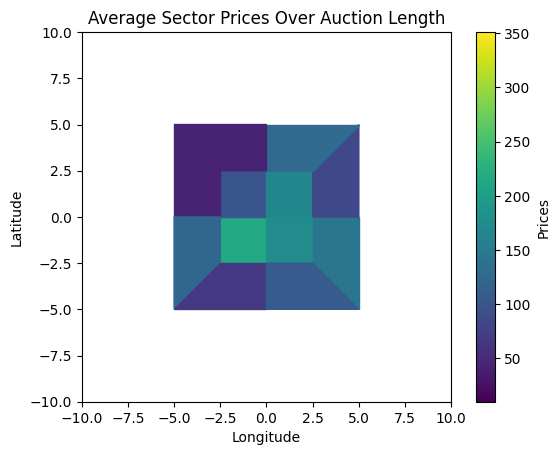

In [434]:
from matplotlib import cm
from matplotlib.colors import Normalize

# Plot the heatmap of the sector prices (just do a grid for now)
# colors = sns.color_palette('colorblind', 16)
color_ind = 0

# Convert the avg_sector_prices dictionary to a list of tuples
sector_prices_list = list(avg_sector_prices.items())

# Extract the sector names and prices
sectors = [sector for sector, _ in sector_prices_list]
prices = [price for _, price in sector_prices_list]

normed = Normalize(vmin=min(prices), vmax=max(prices))
colormap = cm.get_cmap('viridis')
color_values = colormap(normed(prices))

print(f"Sectors: {sectors}")
heatmap_map = {sector: color for sector, color in zip(sectors, color_values)}

import matplotlib.patches as patches

# Create a plot
fig, ax = plt.subplots()

# Center
lat_toulouse = 43.6048 - 0.015
long_toulouse = 1.4428

# Dimensions
outer_square_size = 10
inner_square_size = 5
trapezoid_height = 2
circle_radius = 0.5

# Outer square
outer_square = patches.Rectangle((-outer_square_size/2, -outer_square_size/2), 
                                 outer_square_size, outer_square_size, fill=True, color='lightgray')
# ax.add_patch(outer_square)

# Inner square, divided into 4 regions
inner_regions = [["S004", "S003"], ["S001", "S002"]]
for i in range(2):
    for j in range(2):
        rect = patches.Rectangle(((-inner_square_size/2 + i*inner_square_size/2), 
                                  (-inner_square_size/2 + j*inner_square_size/2)), 
                                  inner_square_size/2, inner_square_size/2, 
                                  fill=True, color=heatmap_map[inner_regions[i][j]])
        ax.add_patch(rect)
        # color_ind += 1

# Trapezoids and Circles on each side of the square
trapezoid_regions = ["S005", "S006", "S0011", "S0012", "S008", "S007", "S0010", "S009"] # right bottom, right top, upper right, upper left, left top, left bottom, bottom left, bottom right
# bottom, top, right, left
trapezoid_colors = ["blue", "red", "green", "purple", "lightblue", "orange", "pink", "lightgreen"] 
trapezoid_ind = 0
# for dx, dy, angle in [(0, -1, 0), (0, 1, 180), (-1, 0, -90), (1, 0, 90)]:
for dx, dy, angle in [(-1, 0, -90), (0, 1, 180), (1, 0, 90), (0, -1, 0)]:
    # Trapezoid divided into two regions
    first_trapezoid_points = np.array([[-inner_square_size/2, -inner_square_size/2],
                                       [0, -inner_square_size/2],
                                       [0, -outer_square_size/2],
                                       [-outer_square_size/2, -outer_square_size/2]])
    second_trapezoid_points = np.array([[0, -inner_square_size/2],
                                        [inner_square_size/2, -inner_square_size/2],
                                        [outer_square_size/2, -outer_square_size/2],
                                        [0, -outer_square_size/2]])
    # large_trapezoid_points = np.array([[-inner_square_size/2, -inner_square_size/2],
    #                              [inner_square_size/2, -inner_square_size/2],
    #                              [outer_square_size/2, -outer_square_size/2],
    #                              [-outer_square_size/2, -outer_square_size/2]])
    # first_trapezoid = np.array([large_trapezoid_points[0], [-inner_square_size/2, (large_trapezoid_points[0][] + large_trapezoid_points[1]) / 2, (large_trapezoid_points[3] + large_trapezoid_points[2]) / 2, (large_trapezoid_points[0] + large_trapezoid_points[3])])
    first_trapezoid_points = first_trapezoid_points @ np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle))], 
                                                    [np.sin(np.radians(angle)), np.cos(np.radians(angle))]])
    second_trapezoid_points = second_trapezoid_points @ np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle))], 
                                                    [np.sin(np.radians(angle)), np.cos(np.radians(angle))]])
    # print(large_trapezoid_points[0])
    # print(f"Trapezoid points: {first_trapezoid}")
    # print(trapezoid_points)
    # trapezoid_points[:, 0] += dx * outer_square_size/2
    # trapezoid_points[:, 1] += dy * outer_square_size/2
    ax.add_patch(patches.Polygon(first_trapezoid_points, fill=True, color=heatmap_map[trapezoid_regions[trapezoid_ind]]))
    trapezoid_ind += 1
    ax.add_patch(patches.Polygon(second_trapezoid_points, fill=True, color=heatmap_map[trapezoid_regions[trapezoid_ind]]))
    trapezoid_ind += 1
    
    # Trapezoid region split
    # trapezoid_split = (trapezoid_points[0] + trapezoid_points[1]) / 2
    # ax.plot([trapezoid_split[0], (trapezoid_points[2, 0] + trapezoid_points[3, 0]) / 2],
    #         [trapezoid_split[1], (trapezoid_points[2, 1] + trapezoid_points[3, 1]) / 2], color=colors[color_ind])

    # Circle
    # circle = patches.Circle(((dx * (outer_square_size+inner_square_size)/2/2), (dy * (outer_square_size+inner_square_size)/2/2)), 
    #                         circle_radius, fill=True, color=colors[color_ind])
    # ax.add_patch(circle)
    # color_ind += 1

# Adjust plot limits
ax.set_xlim(-outer_square_size, outer_square_size)
ax.set_ylim(-outer_square_size, outer_square_size)
ax.set_aspect('equal')

# Create a scalar mappable object for the color bar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normed)
sm.set_array([])

# Add the color bar
cbar = fig.colorbar(sm, orientation='vertical', ax=ax)
cbar.set_label('Prices')

# Display the plot
plt.title("Average Sector Prices Over Auction Length")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.show()
plt.savefig("sector_prices_avg_over_auction_length.png")


In [435]:
import pandas as pd

# Fairness Histogram
df = pd.read_csv('results/modified_toulouse_case3_withC_cap5_withReturn_fisher_100.0_1.0_1.0_1.0_2.0_500.0/final.csv')
print(data.columns)

adjusted_valuation = []
for val, delay, status in zip(df['Valuation'], df['Delay'], df['Status']):
    if status != 'dropped':
        adjusted_valuation.append(val * (0.95 ** delay))
    else:
        adjusted_valuation.append(1)
df['adjusted_valuation'] = adjusted_valuation

# Step 3: Create a figure and axis for the plot
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(df['Agent']))

# Step 4: Plot budget on the first axis
bar_width = 0.25
ax1.bar(x-bar_width, df['Ori. Budget'], bar_width, color='b', alpha=0.6, label='Budget')
ax1.set_xlabel('Agent Name')
ax1.set_ylabel('Budget', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(df['Agent'], rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='b')

# Step 5: Create a second y-axis for valuation and adjusted valuation
ax2 = ax1.twinx()

# Plot valuation and adjusted valuation
ax2.bar(x, df['Valuation'], bar_width, color='g', label='Desired Utility')
ax2.bar(x+bar_width, df['adjusted_valuation'], bar_width, color='r', label='Utility')

# Label the second y-axis
ax2.set_ylabel('Utility', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add a legend for both axes
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.title('Budget, Utility, and Adjusted Utility for Agents')
plt.savefig('budget_utility_adjusted_utility.png')
plt.show()

percentage_utility = df['adjusted_valuation'] / df['Valuation']
plt.plot(df['Ori. Budget'], percentage_utility, 'o')
plt.show()

AttributeError: 'dict' object has no attribute 'columns'